In [25]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
import urllib
# Retrieve file.
url = 'https://raw.githubusercontent.com/zz4fap/t319_aprendizado_de_maquina/main/labs/lab5_functions.py'
urllib.request.urlretrieve(url, filename='./lab5_functions.py')
import lab5_functions as lab5

In [26]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

## Gerando o conjunto de treinamento

In [27]:
# Number of pairs attribute/label.
N = 10000

In [28]:
# Attributes 1
x1 = 10.0*np.random.randn(N, 1) + 10.0

# Attributes 2
x2 = np.random.randn(N, 1) 

# Target function.
y = x1 + x2

# Noise.
w = np.random.randn(N, 1)

# Noisy version.
y_noisy = y + w

# Concatenate both column vectors.
X = np.c_[x1, x2]

## 1. Sem escalonamento dos atributos

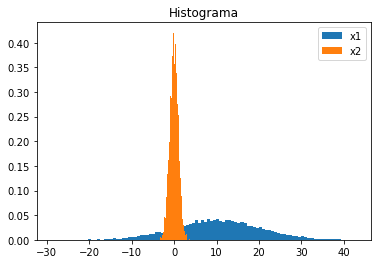

In [29]:
# Histograma dos atributos $x_1$ e $x_2$
lab5.plotHistogram(x1, x2)

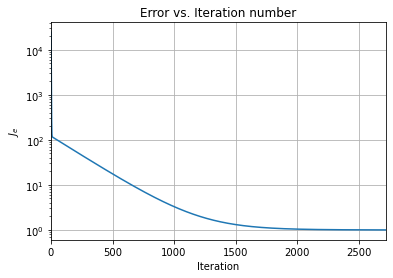

In [30]:
# learning rate.
alpha = 0.001

# Maximum number of iterations.
n_iterations = 10000

# Execute the gradient descent algorithm to find a solution to this regression problem.
a, Jgd, a_hist, grad_hist, iteration = lab5.batchGradientDescent(X, y_noisy, alpha, n_iterations)

# Plot the error versus the number of iterations.
lab5.plotErroVersusIteration(Jgd, iteration)

In [31]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

In [32]:
# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = lab5.calculateErrorSurface(X, y_noisy)

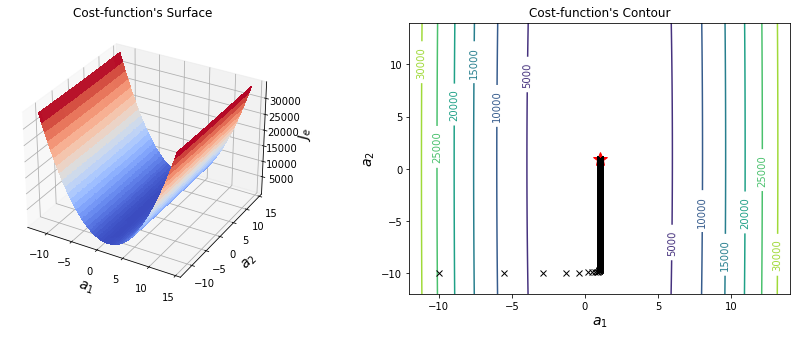

In [33]:
# Plot cost-function surface.
lab5.plotCostFunction(A1, A2, J, a_opt, a_hist, iteration)

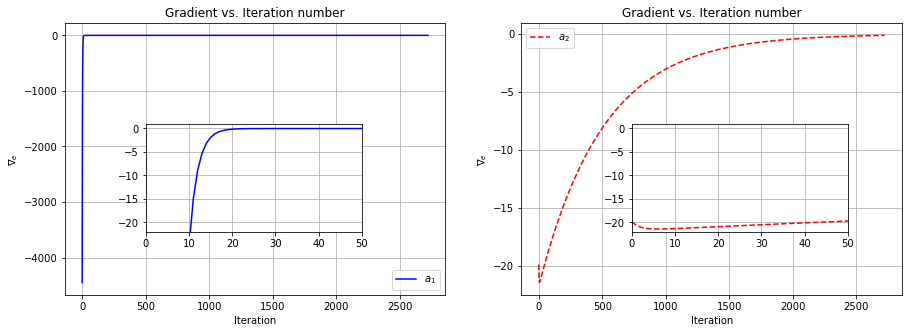

In [34]:
lab5.plotGradientHistory(grad_hist, iteration, x_max=50)

## 2. Padronizando os atributos

In [35]:
# Import Class StandardScaler from module Preprocessing of 
# library sklearn responsible for standardizing the data.
from sklearn.preprocessing import StandardScaler

# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Standardize the features.
scaled_X = stdScaler.fit_transform(X)

scaled_x1 = scaled_X[:,0].reshape(N,1)
scaled_x2 = scaled_X[:,1].reshape(N,1)

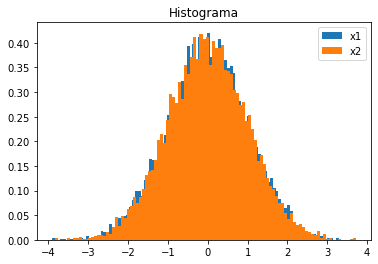

In [36]:
lab5.plotHistogram(scaled_x1, scaled_x2)

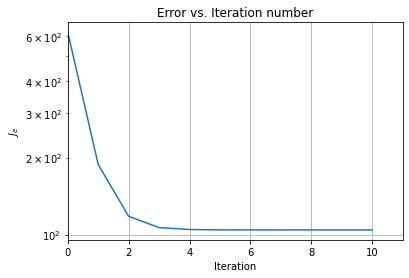

In [37]:
# learning rate.
alpha = 0.3

# Maximum number of iterations.
n_iterations = 10000

# Execute the gradient descent algorithm to find a solution to this regression problem.
a, Jgd, a_hist, grad_hist, iteration = lab5.batchGradientDescent(scaled_X, y_noisy, alpha, n_iterations)

# Plot the error versus the number of iterations.
lab5.plotErroVersusIteration(Jgd, iteration)

In [38]:
# Closed-form solution.
a_opt_pad = np.linalg.pinv(np.transpose(scaled_X).dot(scaled_X)).dot(np.transpose(scaled_X).dot(y_noisy))

In [39]:
# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = lab5.calculateErrorSurface(scaled_X, y_noisy, -10.0, 30.0, -19.0, 21.0)

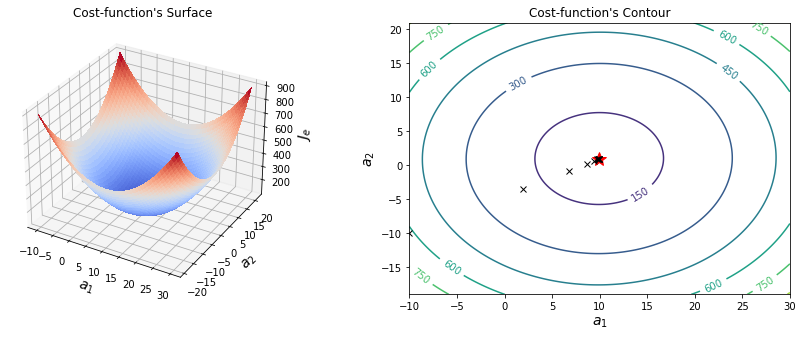

In [40]:
# Plot cost-function surface.
lab5.plotCostFunction(A1, A2, J, a_opt_pad, a_hist, iteration)

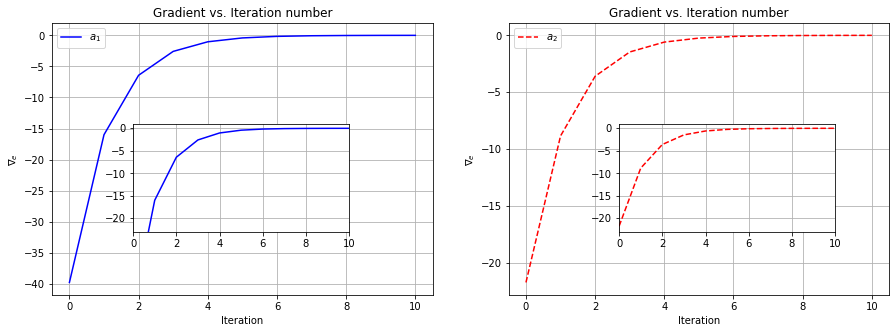

In [41]:
# Plot gradient history.
lab5.plotGradientHistory(grad_hist, iteration, x_max=10)

## 3. Normalizando os atributos

In [42]:
# Import Class MinMaxScaler from module Preprocessing of library sklearn responsible for normalizing the data.
from sklearn.preprocessing import MinMaxScaler

# Instantiate a MinMax scaler.
minMaxScaler = MinMaxScaler()

# Standardize the features.
scaled_X = minMaxScaler.fit_transform(X)

scaled_x1 = scaled_X[:,0].reshape(N,1)
scaled_x2 = scaled_X[:,1].reshape(N,1)

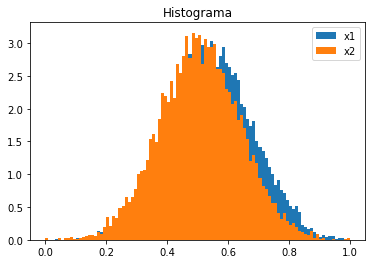

In [43]:
lab5.plotHistogram(scaled_x1, scaled_x2)

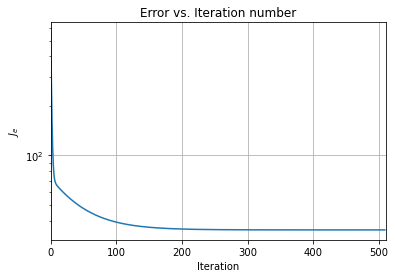

In [44]:
# learning rate.
alpha = 0.3

# Maximum number of iterations.
n_iterations = 10000

# Execute the gradient descent algorithm to find a solution to this regression problem.
a, Jgd, a_hist, grad_hist, iteration = lab5.batchGradientDescent(scaled_X, y_noisy, alpha, n_iterations)

# Plot the error versus the number of iterations.
lab5.plotErroVersusIteration(Jgd, iteration)

In [45]:
# Closed-form solution.
a_opt_norm = np.linalg.pinv(np.transpose(scaled_X).dot(scaled_X)).dot(np.transpose(scaled_X).dot(y_noisy))

In [46]:
# Generate points for plotting the cost-function surface without feature scaling.
J, A1, A2 = lab5.calculateErrorSurface(scaled_X, y_noisy, -10.0, 94.0, -72.0, 30.0)

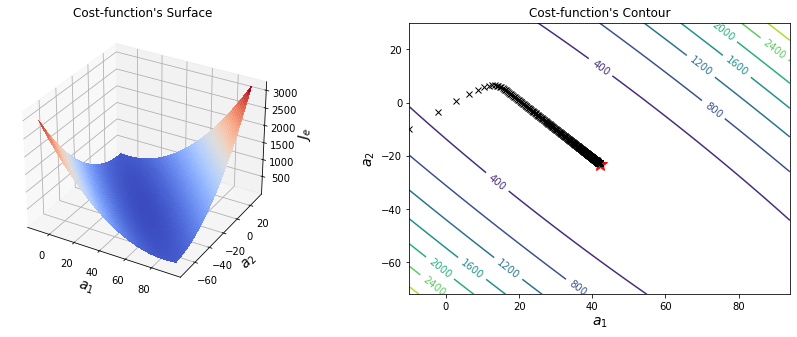

In [47]:
# Plot cost-function surface.
lab5.plotCostFunction(A1, A2, J, a_opt_norm, a_hist, iteration)

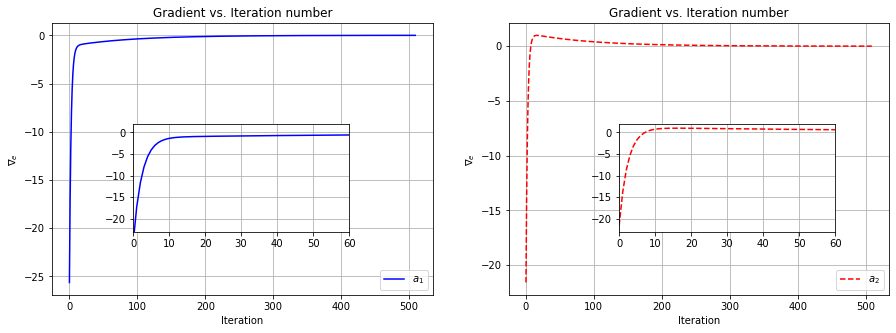

In [48]:
lab5.plotGradientHistory(grad_hist, iteration, x_max=60)